In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)
print("Total Images - ",image_count_train+image_count_test)

2239
118
Total Images -  2357


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  label_mode="int",
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [9]:
num_classes=len(class_names)
num_classes

9

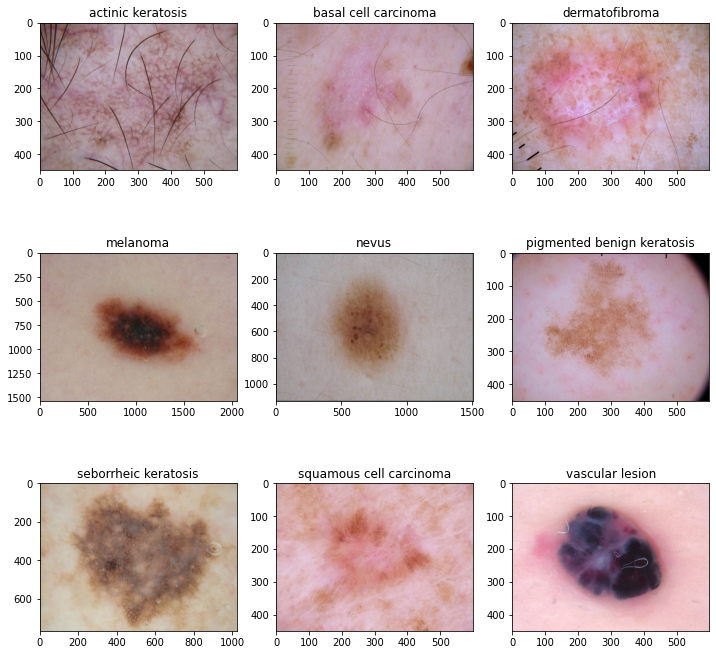

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[0]))
  plt.title(class_names[i])
  plt.imshow(image)  
### your code goes here, you can use training or validation data to visualize

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [11]:
### Your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [12]:
# View the summary of all layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 241ms/step - loss: 2.0853 - accuracy: 0.2282 - val_loss: 1.9317 - val_accuracy: 0.2394
Epoch 2/20
56/56 [==============================] - 15s 236ms/step - loss: 1.7582 - accuracy: 0.3588 - val_loss: 1.5643 - val_accuracy: 0.4698
Epoch 3/20
56/56 [==============================] - 15s 243ms/step - loss: 1.4947 - accuracy: 0.4838 - val_loss: 1.4353 - val_accuracy: 0.5078
Epoch 4/20
56/56 [==============================] - 16s 263ms/step - loss: 1.3598 - accuracy: 0.5218 - val_loss: 1.3838 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 15s 236ms/step - loss: 1.2783 - accuracy: 0.5502 - val_loss: 1.4350 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 15s 238ms/step - loss: 1.2230 - accuracy: 0.5592 - val_loss: 1.4975 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 15s 239ms/step - loss: 1.1126 - accuracy: 0.6127 - val_loss: 1.4430 - val_accuracy: 0.5168

Observation

1.The training accuracy of 20th epoch is 87.95% and validation accuracy is 51.45%.

2.The accuracy of training dataset is greater than the validation dataset.
This shows the Overfitting or high variance issue in the above model.

3.There is a large variation in each epoch between the training and validation accuracy1 But most of the cases the accuracy of our training dataset is greater than our validating accuracy. 

4.In terms of ‘loss’, overfitting reveals itself when our model has a low error in the training set and a higher error in the validation set.





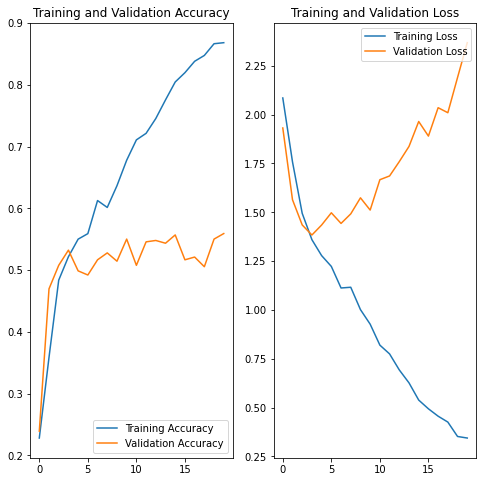

In [15]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Observation

1.The accuracy of training dataset is increasing for every epoch but the accuracy of validation dataset is showing high variation in each epoch. But the accuracy of validation dataset is less than the training dataset after 5th epochs.

2.The loss of training dataset is decresing for every epoch but the loss of validation dataset is also showing high variation in each epoch, but the loss is greater than the training dataset after 5th epoch.

3.This is the result of overfitting of the model. The model fits too well to the training set.
4.It then becomes difficult for the model to generalize to new examples that were not in the training set.

In [ ]:
#Choose an appropriate data augmentation strategy to resolve overfitting

In [16]:
# Create few preprocessing layers of Data augmentation 

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip(mode ='horizontal_and_vertical'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(factor = 0.3, fill_mode='reflect'),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect'),
  tf.keras.layers.experimental.preprocessing.RandomContrast(factor = 0.3)
])

In [ ]:
# Rebuild the model after data Augmentation

In [17]:
### Your code goes here
model = Sequential([data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes, activation='softmax')
])

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 25s 356ms/step - loss: 2.0775 - accuracy: 0.2316 - val_loss: 1.8503 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 22s 365ms/step - loss: 1.8388 - accuracy: 0.3348 - val_loss: 1.7859 - val_accuracy: 0.3826
Epoch 3/20
56/56 [==============================] - 21s 350ms/step - loss: 1.7319 - accuracy: 0.3744 - val_loss: 1.5912 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 21s 353ms/step - loss: 1.6038 - accuracy: 0.4330 - val_loss: 1.5657 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 21s 349ms/step - loss: 1.5830 - accuracy: 0.4302 - val_loss: 1.4434 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 22s 355ms/step - loss: 1.5389 - accuracy: 0.4660 - val_loss: 1.9267 - val_accuracy: 0.3468
Epoch 7/20
56/56 [==============================] - 25s 423ms/step - loss: 1.5873 - accuracy: 0.4314 - val_loss: 1.3907 - val_accuracy: 0.5056
Epoch 8/20

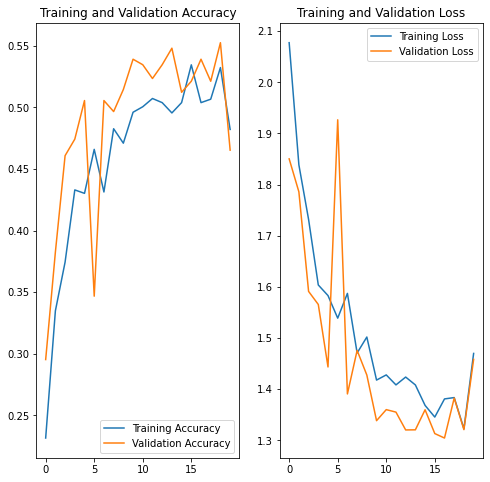

In [20]:
#Visualizing training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Observation:No improvement in training and validation accuracies after data augmentation but the problem of overfiiting is somewhat reduced

Find the distribution of classes in the training dataset.

Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

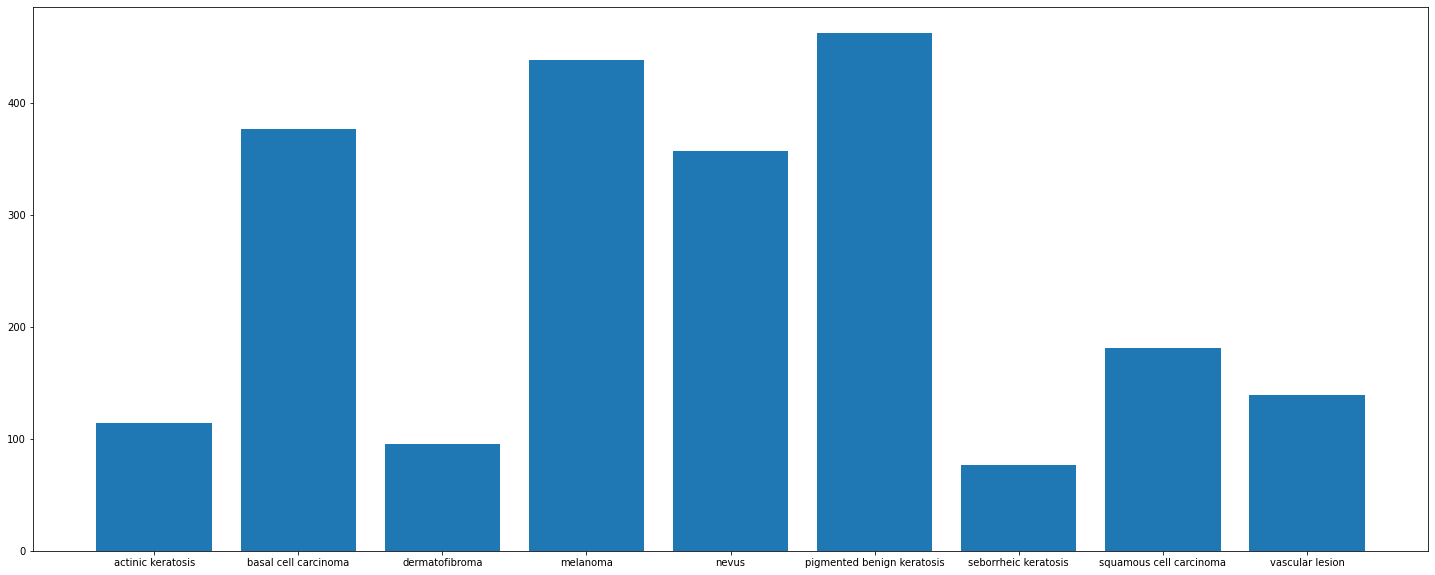

In [21]:
# Find the distribution of classes in the training dataset
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

Obervations:
 1. Seborrheic keratosis has least number of samples

 2. Pigmented benign keratosis be the dominating classes followed by Melanoma

**Rectify the class imbalance using Augmentor library**

In [22]:
!pip install Augmentor


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1.Instantiate a Pipeline object pointing to a directory containing your initial image data set.

2.Define a number of operations to perform on this data set using your Pipeline object.

3.Execute these operations by calling the Pipeline’s sample() method.

In [23]:
import Augmentor

path_to_data = "/content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train"



In [24]:
for i in class_names:
    p = Augmentor.Pipeline(path_to_data +"/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.4)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
     

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F457ACDCC10>: 100%|██████████| 500/500 [00:18<00:00, 27.54 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44FCD0F100>: 100%|██████████| 500/500 [00:19<00:00, 26.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4516390430>: 100%|██████████| 500/500 [00:18<00:00, 27.12 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F4570401820>: 100%|██████████| 500/500 [01:34<00:00,  5.31 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7F451623BB20>: 100%|██████████| 500/500 [01:14<00:00,  6.71 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44FC1A9F40>: 100%|██████████| 500/500 [00:18<00:00, 27.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F45161E8FD0>: 100%|██████████| 500/500 [00:41<00:00, 11.97 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44FC46AF10>: 100%|██████████| 500/500 [00:17<00:00, 28.06 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F44FC493130>: 100%|██████████| 500/500 [00:20<00:00, 24.51 Samples/s]


In [25]:
# Look at total count of augmented images
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)
     

4500


<BarContainer object of 9 artists>

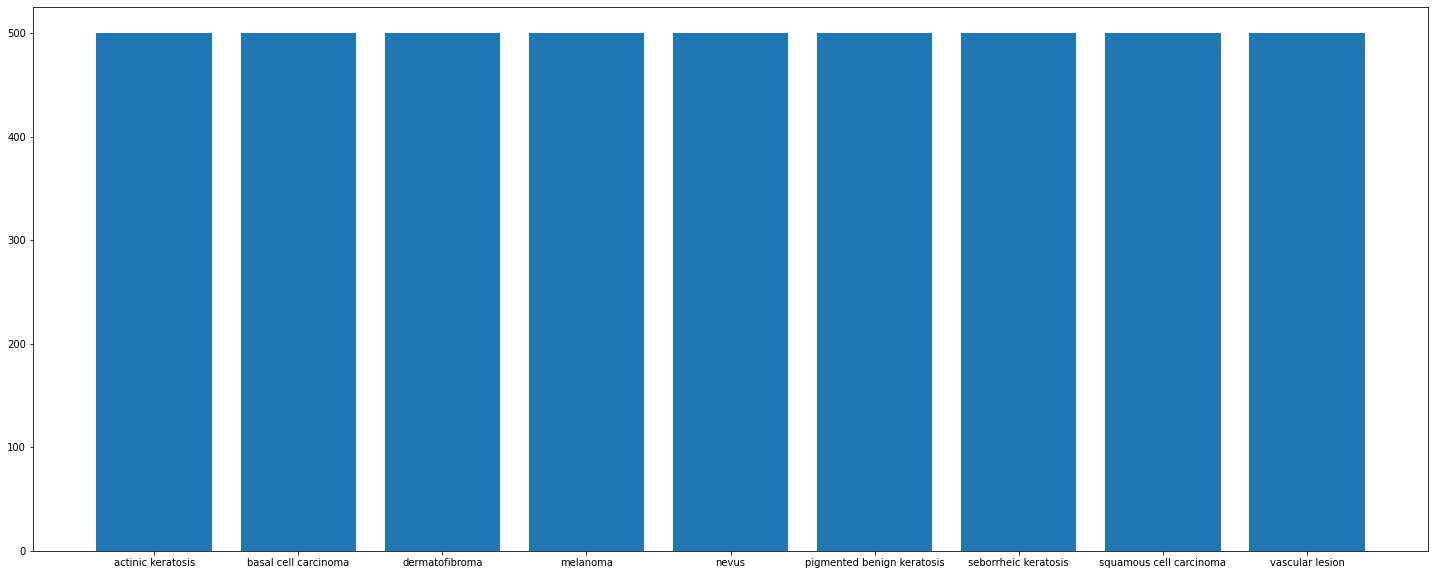

In [26]:
# Find the distribution of classes in the training dataset
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'*/output/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

**Train the model on the data created using Augmentor**

In [27]:
# Initialize the batch size and the image size
batch_size = 32
img_height = 180
img_width = 180
     

In [28]:
image_count_train1 = len(list(data_dir_train.glob('*/*.jpg')))
print("Images in the Training dataset:",image_count_train1)

Images in the Training dataset: 2239


**Create a training dataset**

In [29]:
# "path to directory with training data + data created using augmentor"
import pathlib
path_to_train_directory="/content/drive/My Drive/melonoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(path_to_train_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Create the model using newly created datasets (make sure to include normalization)**

In [31]:
### Your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes, activation='softmax')
])

In [32]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

In [33]:
# Number of epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 32s 182ms/step - loss: 1.9636 - accuracy: 0.2641 - val_loss: 1.7404 - val_accuracy: 0.3623
Epoch 2/30
169/169 [==============================] - 31s 177ms/step - loss: 1.5888 - accuracy: 0.4004 - val_loss: 1.4114 - val_accuracy: 0.4633
Epoch 3/30
169/169 [==============================] - 31s 176ms/step - loss: 1.4718 - accuracy: 0.4429 - val_loss: 1.3549 - val_accuracy: 0.4907
Epoch 4/30
169/169 [==============================] - 31s 175ms/step - loss: 1.3900 - accuracy: 0.4646 - val_loss: 1.2859 - val_accuracy: 0.5004
Epoch 5/30
169/169 [==============================] - 31s 177ms/step - loss: 1.3180 - accuracy: 0.5006 - val_loss: 1.2465 - val_accuracy: 0.5152
Epoch 6/30
169/169 [==============================] - 32s 185ms/step - loss: 1.2501 - accuracy: 0.5269 - val_loss: 1.1798 - val_accuracy: 0.5768
Epoch 7/30
169/169 [==============================] - 31s 177ms/step - loss: 1.1695 - accuracy: 0.5592 - val_loss: 1.1679 - val_accuracy: 0.5

Observation:Model can be furthur improved by adding more convolutional layers and dropouts after convolution layers

In [37]:
### Your code goes here
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(num_classes, activation='softmax')
])

In [38]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# Number of epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 184ms/step - loss: 2.1132 - accuracy: 0.1693 - val_loss: 1.9091 - val_accuracy: 0.2680
Epoch 2/30
169/169 [==============================] - 32s 184ms/step - loss: 1.8352 - accuracy: 0.2858 - val_loss: 1.7241 - val_accuracy: 0.3541
Epoch 3/30
169/169 [==============================] - 31s 180ms/step - loss: 1.6842 - accuracy: 0.3713 - val_loss: 1.5319 - val_accuracy: 0.4291
Epoch 4/30
169/169 [==============================] - 31s 179ms/step - loss: 1.5858 - accuracy: 0.3999 - val_loss: 1.4258 - val_accuracy: 0.4462
Epoch 5/30
169/169 [==============================] - 32s 182ms/step - loss: 1.5040 - accuracy: 0.4251 - val_loss: 1.3957 - val_accuracy: 0.4558
Epoch 6/30
169/169 [==============================] - 31s 179ms/step - loss: 1.4549 - accuracy: 0.4462 - val_loss: 1.3512 - val_accuracy: 0.4736
Epoch 7/30
169/169 [==============================] - 31s 180ms/step - loss: 1.3921 - accuracy: 0.4674 - val_loss: 1.2910 - val_ac

observations:

<br>
    
1.With the use of Augmentor library, accuracy got increased significantly

<br>

2.Model is still seems to be overfitting

<br>

3.The problem of overfitting can be solved by adding more number of layer,neurons or adding dropout layers.

<br>

4.The Model can be further improved by tuning the hyperparameter